## Business Analytics

1. MIS:Management Inormation system which gives information about data and leads to new process.
2. Detective Analysis :What are causes of peaks of changes in data.
3. Dashboard - Wau of representing our data.
4. Predictive modelling: Predicting things on basis on previous data.

### Model Building

##### 1. Problem definition:
     Identifying the main parts and probblem and defiing it mathematically.
##### 2. Hypothesis Generation:
    It should be holistic, without personalbias and discussed  since your model will dependent ont this.You should do hypothesis generation before data collection.
##### 3. Data Collection:


##### 4. Data Exploration and Transformation:
    a. Variable identification:continuous or categorical
    b. Univariate Analysis:Continous variable->central tendency,dispersion,mean median etc;CATEGORICAL : we look into distribution .their count and count% in respective categorie.
    c. Multi variate analysis:finding relation b/w variables.
    d. Missing value treatment
    e. outlier treatment
    f. Variable transformation:Log,sqrt,binning,combine categories.
    

##### 5. Predictive Modelling: 
     It is predicting future bhaviour from past data:
     a. Algorithm Selection
     b. Training model
     c. Sprediction/scoring.

###### ML Algorithm Selection:

### Exercise

#### Hypothesis Generation:
 1. List of variables is :Age,Gender,Occupation,Nationality,Workig hours,Education,Maritial Status,College type,Total work exp.,is his profile rare,Location,Company type,Job type,Skills,Race,Job role,Ownership of properity.
 

# Model 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

train=pd.read_csv("/home/pushpendra/Downloads/Train_data_av.csv")
test=pd.read_csv("/home/pushpendra/Downloads/Test_data_av.csv")
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [2]:
#Lets look data types of variables
train.dtypes


ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [3]:
train.describe()


,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


## Univariate Analysis

In [4]:
# Get a list of categorical variable 
categorical_variable=train.dtypes.loc[train.dtypes=="object"].index
print(categorical_variable)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [5]:
# NOw use apply function to determine no. of unique values in each column.
train[categorical_variable].apply(lambda x:len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [6]:
#print the count of each category
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [7]:
# Determinee the % 
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [8]:
#Native Country
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

## Mutivariate Analysis


In [9]:
# Cross tabulation
ct=pd.crosstab(train['Sex'],train['Income.Group'],margins=True)
print(ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


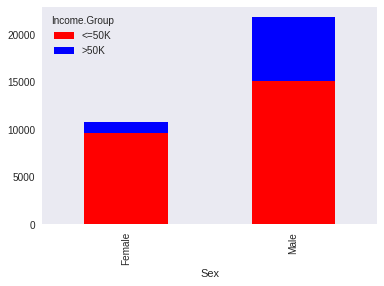

In [10]:
#bar plot 
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind="bar",stacked=True,color=['red','blue'],grid=False)

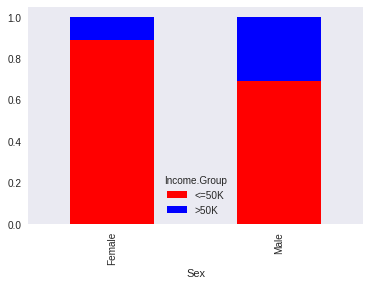

In [11]:
def perconverter(ser):
    return ser/float(ser[-1])
ct2=ct.apply(perconverter,axis=1)
ct2.iloc[:-1,:-1].plot(kind="bar",stacked=True,color=['red','blue'],grid=False)

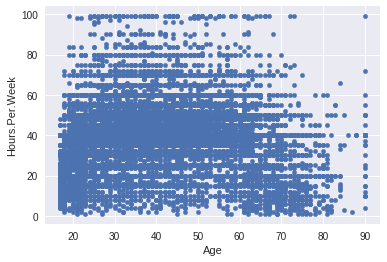

In [12]:
train.plot("Age","Hours.Per.Week",kind="scatter")

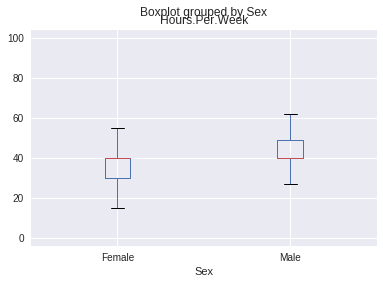

In [13]:
train.boxplot(column="Hours.Per.Week",by="Sex")


## Missing Value Treatment

In [14]:
#Checking missing values in train data
train.apply(lambda x:sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [15]:
#Checking missing values in test data
test.apply(lambda x:sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

In [16]:
#Filling the missing data
train['Workclass'].fillna(train.Workclass.dropna().max(),inplace=True)
train['Occupation'].fillna(train.Occupation.dropna().max(),inplace=True)
train['Native.Country'].fillna(train['Native.Country'].dropna().max(),inplace=True)

In [17]:
# Now check is ther any missing value
train.apply(lambda x:sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [18]:
#Filling the missing data in test data
test['Workclass'].fillna(test.Workclass.dropna().max(),inplace=True)
test['Occupation'].fillna(test.Occupation.dropna().max(),inplace=True)
test['Native.Country'].fillna(test['Native.Country'].dropna().max(),inplace=True)

In [19]:
# Now check is ther any missing value
test.apply(lambda x:sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

## Outlier Treatment 

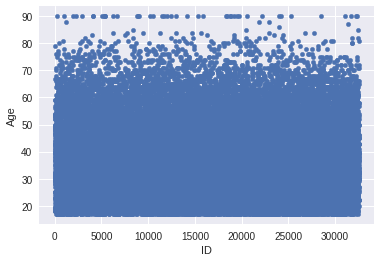

In [20]:
#Marking a scatter plot for age
%matplotlib inline
train.plot('ID','Age',kind="scatter")

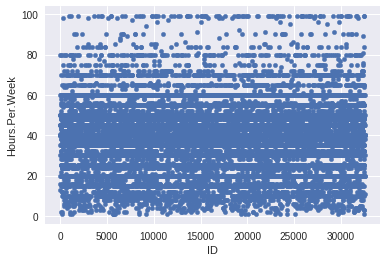

In [21]:
%matplotlib inline
train.plot('ID','Hours.Per.Week',kind="scatter")

## Variable Transformation

In [22]:
#Determine the % of observation in Work Class
train['Workclass'].value_counts()/train.shape[0]

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
Without-pay         0.056816
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Never-worked        0.000215
Name: Workclass, dtype: float64

In [23]:
categories_to_combine=["State-gov","Without-pay","Self-emp-inc","Federal-gov","Never-worked"]
#Run a loop to combine thes values
for cat in categories_to_combine:
    train['Workclass'].replace({cat:"others"},inplace=True)
    test['Workclass'].replace({cat:"others"},inplace=True)

In [24]:
#Check the new categories
train['Workclass'].value_counts()/train.shape[0]

Private             0.697030
others              0.160652
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

In [25]:
#For doing same with others make a list of categories 
categories_variables=list(train.dtypes.loc[train.dtypes=="object"].index)
categories_variables=categories_variables[1:]
train[categories_variables].apply(lambda x:len(x.unique()))

Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

In [26]:
#Run a lop for each category
for col in categories_variables:
    freq=train[col].value_counts()/train.shape[0]
    categories_to_combine=freq.loc[freq.values<0.05].index
    
    for cat in categories_to_combine:
        train[col].replace({cat:"others"},inplace=True)
        test[col].replace({cat:"others"},inplace=True)

In [27]:
#check the result from train data
train[categories_variables].apply(lambda x:len(x.unique()))

Education         5
Marital.Status    4
Occupation        9
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

## Predictive Modelling

### Data Preprocessing

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
categories_variables=train.dtypes.loc[train.dtypes=="object"].index
categories_variables_test=test.dtypes.loc[test.dtypes=="object"].index
categories_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [30]:
# Now we convert object type to  numerical
le=LabelEncoder()
for var in categories_variables:
    
    le.fit(train[var])
    train[var]=le.transform(train[var])
 
for var in categories_variables_test:
    le.fit(test[var])
    test[var]=le.transform(test[var])

In [31]:
#check now datatypes
train.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
Income.Group      int64
dtype: object

In [ ]:
#Fit the model
from sklearn.tree import DecisionTreeClassifier
dependent_variable='Income.Group'
independent_variable=[x for x in train.columns if x  not in ["ID",dependent_variable]]
print(independent_variable)

In [ ]:
#Initialize the algorithm
model=SVC()
#DecisionTreeClassifier(max_depth=10,min_samples_leaf=100,max_features='sqrt')
model.fit(train[independent_variable],train[dependent_variable])


In [ ]:
predict_train=model.predict(train[independent_variable])
predict_test=model.predict(test[independent_variable])

In [ ]:
from sklearn.metrics import accuracy_score

acc_train=accuracy_score(train[dependent_variable],predict_train)
print("Train accuracy %f "%acc_train)


Train accuracy 0.841098 


In [ ]:
prediction=list()
for i in range(len(predict_test)):
    if predict_test[i] ==0:
        prediction.append("<=50K")
    else:
        prediction.append(">50K")
submission=pd.DataFrame({"ID":test["ID"],
                        "Income.Group":prediction})
submission.to_csv(r'/home/pushpendra/submit.csv',index=False)